In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

In [2]:
# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Load and preprocess the dataset
(X_train, _), (_, _) = mnist.load_data()
X_train = X_train / 127.5 - 1.0
X_train = np.expand_dims(X_train, axis=-1)

In [4]:
# Constants
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)
latent_dim = 100 

In [5]:
# Generator Model
def build_generator():
    model = Sequential()
    model.add(Dense(256, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(np.prod(img_shape), activation='tanh'))
    model.add(Reshape(img_shape))
    return model

In [6]:
# Discriminator Model
def build_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [7]:
# Compile the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

In [8]:
# Build the generator
generator = build_generator()

In [9]:
# GAN model (combined generator and discriminator)
z = tf.keras.Input(shape=(latent_dim,))
img = generator(z)
discriminator.trainable = False  # Freeze discriminator during GAN training
valid = discriminator(img)
gan = tf.keras.Model(z, valid)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [10]:
# Training function
def train(epochs, batch_size=128, sample_interval=1000):
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))
    
    for epoch in range(epochs + 1):
        #  Train Discriminator
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        gen_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(imgs, valid)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        #  Train Generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, valid)

        # Print progress
        if epoch % 100 == 0:
            print(f"{epoch} [D loss: {d_loss[0]:.4f}, acc.: {100*d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")

        # Save generated images at intervals
        if epoch % sample_interval == 0:
            save_imgs(epoch)

In [11]:
# Image saving function
def save_imgs(epoch, examples=25):
    noise = np.random.normal(0, 1, (examples, latent_dim))
    gen_imgs = generator.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale to [0, 1]

    plt.figure(figsize=(5, 5))
    for i in range(examples):
        plt.subplot(5, 5, i + 1)
        plt.imshow(gen_imgs[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Generated Images at Epoch {epoch}")
    plt.tight_layout()
    plt.show()

2/2 [==============================] - 2s 13ms/step
0 [D loss: 0.6336, acc.: 72.66%] [G loss: 0.7771]
1/1 [==============================] - 0s 183ms/step


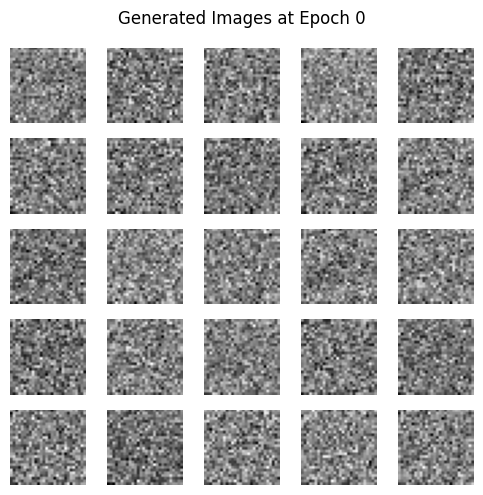

2/2 [==============================] - 0s 16ms/step
100 [D loss: 0.7649, acc.: 44.53%] [G loss: 0.8063]
2/2 [==============================] - 0s 0s/step
200 [D loss: 0.6229, acc.: 47.66%] [G loss: 0.9871]
2/2 [==============================] - 0s 10ms/step
300 [D loss: 0.5705, acc.: 57.03%] [G loss: 0.9263]
2/2 [==============================] - 0s 6ms/step
400 [D loss: 0.5778, acc.: 59.38%] [G loss: 1.0424]
2/2 [==============================] - 0s 3ms/step
500 [D loss: 0.6152, acc.: 62.50%] [G loss: 1.0222]
2/2 [==============================] - 0s 5ms/step
600 [D loss: 0.5674, acc.: 76.56%] [G loss: 1.1592]
2/2 [==============================] - 0s 16ms/step
700 [D loss: 0.4909, acc.: 88.28%] [G loss: 1.2194]
2/2 [==============================] - 0s 11ms/step
800 [D loss: 0.5907, acc.: 64.06%] [G loss: 1.1210]
2/2 [==============================] - 0s 3ms/step
900 [D loss: 0.5751, acc.: 72.66%] [G loss: 1.1583]
2/2 [==============================] - 0s 6ms/step
1000 [D loss: 0.641

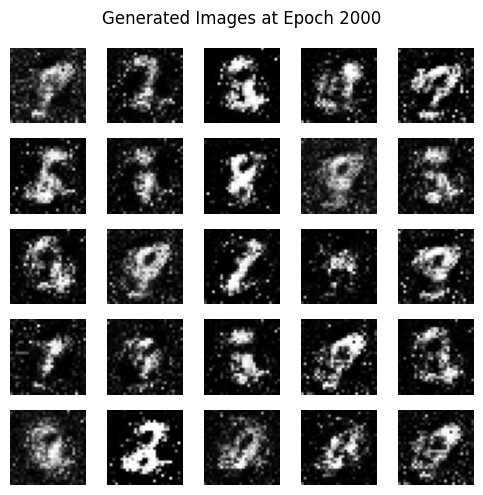

2/2 [==============================] - 0s 10ms/step
2100 [D loss: 0.5528, acc.: 67.97%] [G loss: 1.4571]
2/2 [==============================] - 0s 3ms/step
2200 [D loss: 0.4503, acc.: 82.81%] [G loss: 1.4926]
2/2 [==============================] - 0s 16ms/step
2300 [D loss: 0.5084, acc.: 81.25%] [G loss: 1.5700]
2/2 [==============================] - 0s 8ms/step
2400 [D loss: 0.4829, acc.: 77.34%] [G loss: 1.2961]
2/2 [==============================] - 0s 7ms/step
2500 [D loss: 0.4878, acc.: 78.91%] [G loss: 1.3543]
2/2 [==============================] - 0s 5ms/step
2600 [D loss: 0.5593, acc.: 72.66%] [G loss: 1.2405]
2/2 [==============================] - 0s 3ms/step
2700 [D loss: 0.5093, acc.: 78.12%] [G loss: 1.3523]
2/2 [==============================] - 0s 20ms/step
2800 [D loss: 0.4511, acc.: 81.25%] [G loss: 1.5391]
2/2 [==============================] - 0s 18ms/step
2900 [D loss: 0.5934, acc.: 71.09%] [G loss: 1.2612]
2/2 [==============================] - 0s 0s/step
3000 [D lo

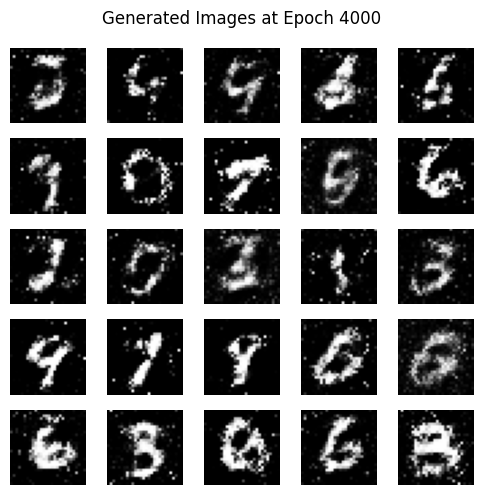

2/2 [==============================] - 0s 5ms/step
4100 [D loss: 0.5839, acc.: 78.12%] [G loss: 1.0717]
2/2 [==============================] - 0s 18ms/step
4200 [D loss: 0.5916, acc.: 68.75%] [G loss: 1.0838]
2/2 [==============================] - 0s 7ms/step
4300 [D loss: 0.5828, acc.: 74.22%] [G loss: 1.0366]
2/2 [==============================] - 0s 15ms/step
4400 [D loss: 0.5566, acc.: 68.75%] [G loss: 1.1160]
2/2 [==============================] - 0s 17ms/step
4500 [D loss: 0.5920, acc.: 67.97%] [G loss: 1.1086]
2/2 [==============================] - 0s 8ms/step
4600 [D loss: 0.6513, acc.: 60.94%] [G loss: 0.9713]
2/2 [==============================] - 0s 21ms/step
4700 [D loss: 0.5979, acc.: 69.53%] [G loss: 1.1476]
2/2 [==============================] - 0s 20ms/step
4800 [D loss: 0.6049, acc.: 68.75%] [G loss: 1.0310]
2/2 [==============================] - 0s 8ms/step
4900 [D loss: 0.6248, acc.: 65.62%] [G loss: 1.0272]
2/2 [==============================] - 0s 6ms/step
5000 [D 

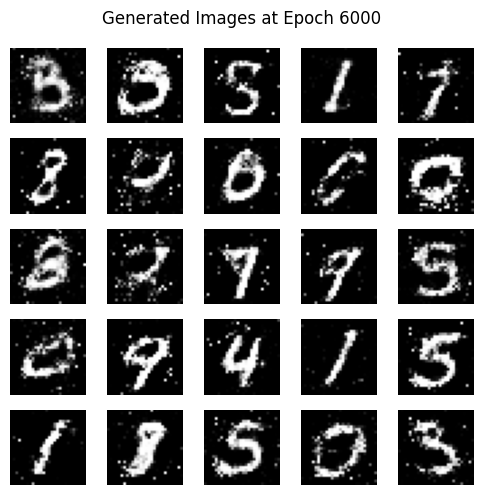

2/2 [==============================] - 0s 16ms/step
6100 [D loss: 0.6050, acc.: 68.75%] [G loss: 0.9913]
2/2 [==============================] - 0s 6ms/step
6200 [D loss: 0.5700, acc.: 72.66%] [G loss: 1.0166]
2/2 [==============================] - 0s 10ms/step
6300 [D loss: 0.5930, acc.: 71.09%] [G loss: 0.9707]
2/2 [==============================] - 0s 10ms/step
6400 [D loss: 0.6629, acc.: 58.59%] [G loss: 0.9636]
2/2 [==============================] - 0s 5ms/step
6500 [D loss: 0.6233, acc.: 64.84%] [G loss: 1.0085]
2/2 [==============================] - 0s 4ms/step
6600 [D loss: 0.6321, acc.: 60.94%] [G loss: 0.9374]
2/2 [==============================] - 0s 6ms/step
6700 [D loss: 0.6185, acc.: 62.50%] [G loss: 1.0393]
2/2 [==============================] - 0s 6ms/step
6800 [D loss: 0.6679, acc.: 56.25%] [G loss: 0.9637]
2/2 [==============================] - 0s 6ms/step
6900 [D loss: 0.6753, acc.: 60.94%] [G loss: 0.9808]
2/2 [==============================] - 0s 19ms/step
7000 [D l

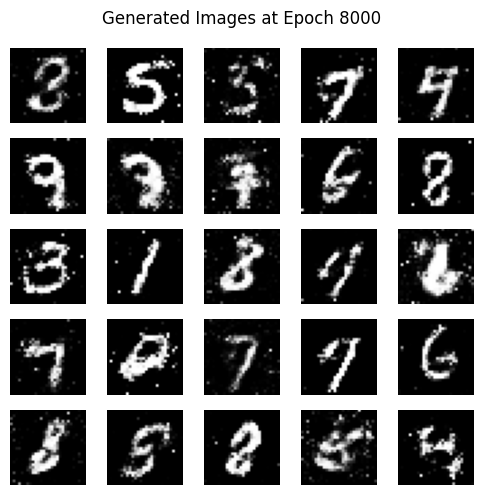

2/2 [==============================] - 0s 16ms/step
8100 [D loss: 0.6309, acc.: 59.38%] [G loss: 1.0146]
2/2 [==============================] - 0s 14ms/step
8200 [D loss: 0.6356, acc.: 68.75%] [G loss: 1.0413]
2/2 [==============================] - 0s 7ms/step
8300 [D loss: 0.6774, acc.: 57.81%] [G loss: 1.0719]
2/2 [==============================] - 0s 5ms/step
8400 [D loss: 0.6275, acc.: 61.72%] [G loss: 1.0425]
2/2 [==============================] - 0s 7ms/step
8500 [D loss: 0.6621, acc.: 57.03%] [G loss: 1.0413]
2/2 [==============================] - 0s 15ms/step
8600 [D loss: 0.6386, acc.: 64.06%] [G loss: 1.0217]
2/2 [==============================] - 0s 8ms/step
8700 [D loss: 0.6137, acc.: 71.09%] [G loss: 0.9938]
2/2 [==============================] - 0s 8ms/step
8800 [D loss: 0.6136, acc.: 68.75%] [G loss: 0.9871]
2/2 [==============================] - 0s 16ms/step
8900 [D loss: 0.6305, acc.: 65.62%] [G loss: 1.0330]
2/2 [==============================] - 0s 12ms/step
9000 [D 

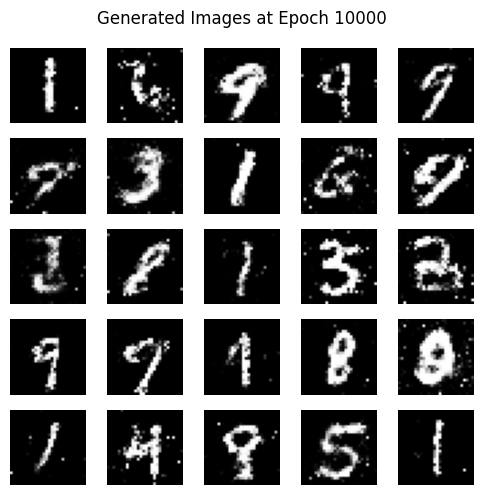

In [12]:
# Start training
train(epochs=10000, batch_size=64, sample_interval=2000)

1/1 [==============================] - 0s 36ms/step


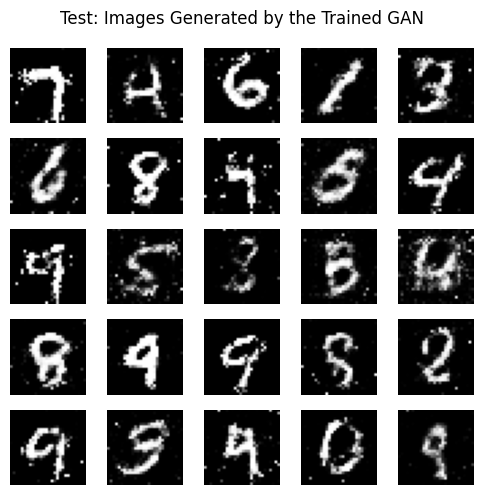

In [13]:
def generate_and_show_images(num_images=25):
    noise = np.random.normal(0, 1, (num_images, latent_dim))
    gen_imgs = generator.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale from [-1, 1] to [0, 1]

    plt.figure(figsize=(5, 5))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(gen_imgs[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.suptitle("Test: Images Generated by the Trained GAN")
    plt.tight_layout()
    plt.show()

generate_and_show_images()

In [14]:
import os
from PIL import Image

def save_generated_images(folder="generated_images", num_images=10):
    os.makedirs(folder, exist_ok=True)
    noise = np.random.normal(0, 1, (num_images, latent_dim))
    gen_imgs = generator.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale

    for i in range(num_images):
        img_array = (gen_imgs[i] * 255).astype(np.uint8)
        img = Image.fromarray(img_array.squeeze(), mode='L')
        img.save(os.path.join(folder, f"generated_{i}.png"))

save_generated_images()

1/1 [==============================] - 0s 41ms/step


In [18]:
import matplotlib.pyplot as plt

def test_and_show_saved_generated_images(folder="generated_images", num_images=10):
    for i in range(num_images):
        # Load and preprocess image
        img_path = os.path.join(folder, f"generated_{i}.png")
        img = Image.open(img_path).convert('L')
        img_array = np.array(img).astype(np.float32) / 127.5 - 1.0
        img_array = np.expand_dims(img_array, axis=(0, -1))  # Shape: (1, 28, 28, 1)

        # Discriminator decision
        decision = discriminator.predict(img_array)[0][0]
        label = "Real" if decision > 0.5 else "Fake"

        # Plot the image and prediction
        plt.imshow(img, cmap='gray')
        plt.title(f"D: {decision:.4f} → {label}")
        plt.axis('off')
        plt.show()

1/1 [==============================] - 0s 48ms/step


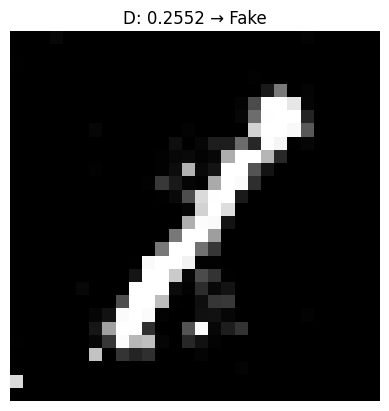

1/1 [==============================] - 0s 48ms/step


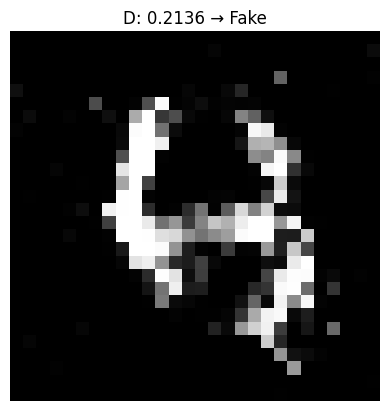

1/1 [==============================] - 0s 36ms/step


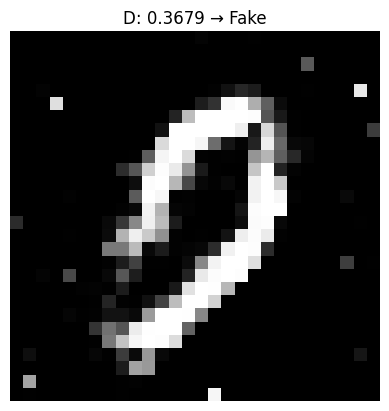

1/1 [==============================] - 0s 32ms/step


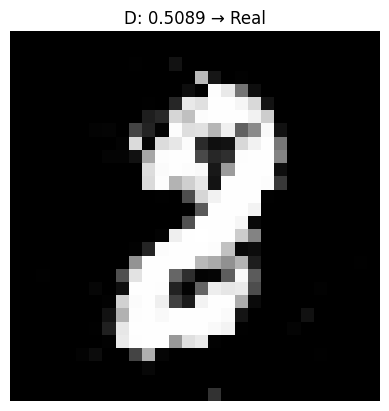

1/1 [==============================] - 0s 45ms/step


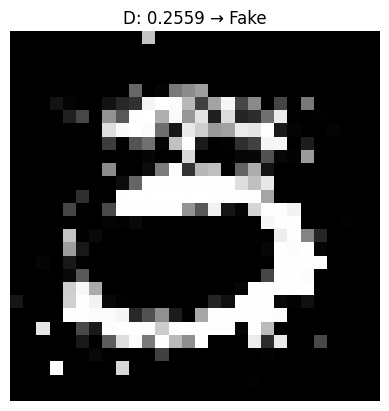

1/1 [==============================] - 0s 48ms/step


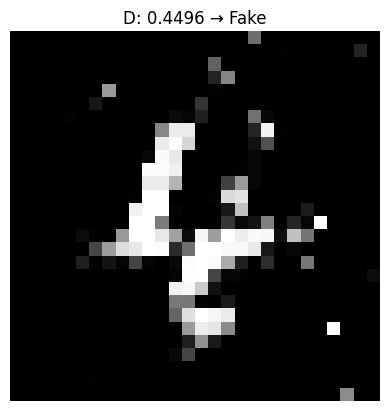

1/1 [==============================] - 0s 53ms/step


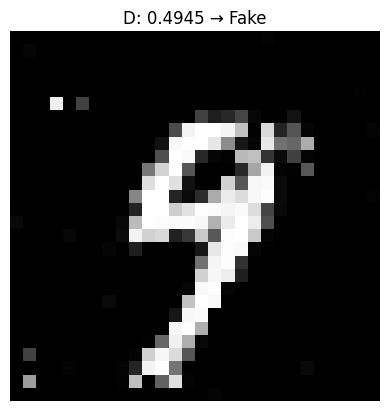

1/1 [==============================] - 0s 53ms/step


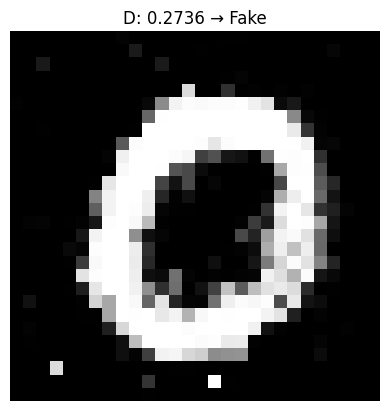

1/1 [==============================] - 0s 48ms/step


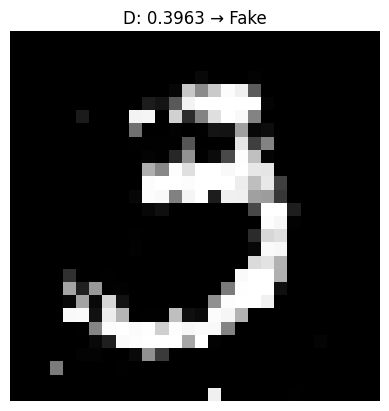

1/1 [==============================] - 0s 48ms/step


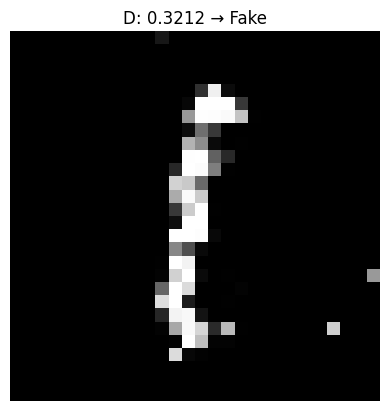

In [19]:
test_and_show_saved_generated_images()